# **BERT TOPIC**

In [3]:
!pip install sentence_transformers
!pip install umap-learn
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 80.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  

In [4]:
import numpy as np
import pandas as pd
import pickle
from bertopic import BERTopic
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Multiply, MaxPooling1D
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import load_model

In [10]:
data = pd.read_csv('/Data/train_data.csv')
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(data['text'])
topic_model.save("/Models/BERTopic/bert_topic_model")

In [ ]:
for x in range(20):
  display(topic_model.get_topic_info(x))

,Topic,Count,Name
0,0,108,0_violent_violence_religion_islam


,Topic,Count,Name
0,1,58,1_uk_british_proud_many


,Topic,Count,Name
0,2,58,2_tolerant_cultures_multiculturalism_we


,Topic,Count,Name
0,3,56,3_european_europe_part_countries


,Topic,Count,Name
0,4,54,4_hate_teaches_hatred_islam


,Topic,Count,Name
0,5,51,5_welcome_country_our_them


,Topic,Count,Name
0,6,50,6_disease_carriers_eradicated_sickening


,Topic,Count,Name
0,7,46,7_peace_opposed_islam_religion


,Topic,Count,Name
0,8,44,8_peaceful_religion_islam_quran


,Topic,Count,Name
0,9,44,9_crimes_criminals_commit_crime


,Topic,Count,Name
0,10,42,10_sites_online_news_sure


,Topic,Count,Name
0,11,38,11_koran_speech_today_read


,Topic,Count,Name
0,12,36,12_western_culture_proven_incompatible


,Topic,Count,Name
0,13,35,13_ought_those_kinds_executed


,Topic,Count,Name
0,14,35,14_cancer_sickness_european_continent


,Topic,Count,Name
0,15,35,15_disgusting_these_disgust_like


,Topic,Count,Name
0,16,34,16_invading_enemies_invasion_areas


,Topic,Count,Name
0,17,33,17_problem_problems_religions_other


,Topic,Count,Name
0,18,33,18_modern_state_incompatible_religions


,Topic,Count,Name
0,19,32,19_halal_meat_eat_start


In [ ]:
topic_model.get_topic(0)

[('violent', 0.06552735614640809),
 ('violence', 0.03393523329567423),
 ('religion', 0.02879979969999893),
 ('islam', 0.02690224518061952),
 ('preachers', 0.01706295603061096),
 ('is', 0.01703902418707357),
 ('not', 0.01563695000089497),
 ('it', 0.014106830046920961),
 ('proof', 0.013548068094017788),
 ('but', 0.013507192237603386)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
# # topic_model.visualize_documents(data['text'])
# n_topics = len(topic_model.topics_)
# n_topics

3004

In [ ]:
# data.shape

(3004, 2)

In [1]:
def encode_topics(topics, max_sequence_length):
    encoder = OneHotEncoder(sparse=False)
    one_hot_encoded = encoder.fit_transform(np.array(topics).reshape(-1, 1))
    attention_weights = one_hot_encoded.sum(axis=1, keepdims=True) / max_sequence_length
    return attention_weights
MAX_NUM_WORDS = 3918
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 50

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# checkpoint_filepath = '/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/BERTopic/BERTopic_Attention_Model.h5'
# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True,
#     verbose=1
# )

In [9]:
df = pd.read_csv('/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/data/train_data.csv')
df['label'] = df['label'].replace({"hate":0,"nothate":1})


tokenizer = Tokenizer(MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
word_index = tokenizer.word_index
data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

with open('/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/BERTopic/bert_attention_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

GLOVE_FILE = '/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/glove.6B.50d.txt'

embeddings_index = {}
with open(GLOVE_FILE, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


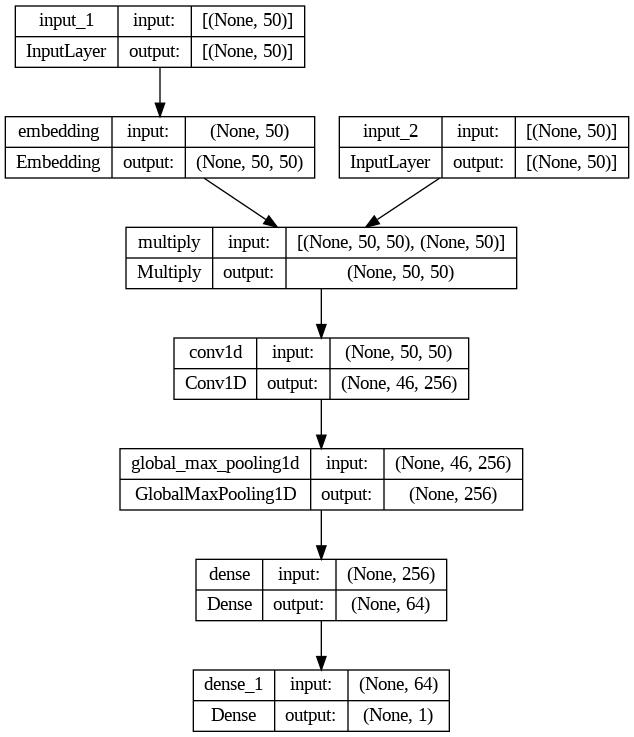

In [11]:
attention_weights = encode_topics(topics, MAX_SEQUENCE_LENGTH)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)
embedded_sequences = embedding_layer(sequence_input)

attention_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
attention_layer = Multiply()([embedded_sequences, attention_input])
conv1 = Conv1D(256, 5, activation='relu')(attention_layer)
pool1 = GlobalMaxPooling1D()(conv1)
dense1 = Dense(64, activation='relu')(pool1)
output = Dense(1, activation='sigmoid')(dense1)
model = Model(inputs=[sequence_input, attention_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

tf.keras.utils.plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True, rankdir='TB', dpi=96)

# model.fit([data, attention_weights], df['label'],validation_split = 0.1, epochs=100, batch_size=32,callbacks=[checkpoint_callback])

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/data/test_data.csv')
df2['label'] = df2['label'].replace({"hate":0,"nothate":1})
with open('/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/BERTopic/bert_attention_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
loaded_topic_model = BERTopic.load("/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/BERTopic/bert_topic_model")
loaded_model = load_model('/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/BERTopic/BERTopic_Attention_Model.h5')

In [ ]:
topics2, probs2 = loaded_topic_model.transform(df2['text'])
attention_weights2 = encode_topics(topics2, MAX_SEQUENCE_LENGTH)

test_sequences = loaded_tokenizer.texts_to_sequences(df2['text'])
test_data_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

pred = loaded_model.predict([test_data_padded,attention_weights2])
loss, acc = loaded_model.evaluate([test_data_padded,attention_weights2],df2['label'], batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc,end = '\n\n')

for i,x in enumerate(pred):#"hate":0,"nothate":1
  if x >= 0.5:
    pred[i] = 1
  else:
    pred[i] = 0
cm = confusion_matrix(df2['label'],pred)
print(cm)
cr = classification_report(df2['label'],pred)
print(cr)

11/11 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.9251
Test loss: 0.2810160219669342
Test accuracy: 0.92514967918396

[[179  10]
 [ 15 130]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       189
           1       0.93      0.90      0.91       145

    accuracy                           0.93       334
   macro avg       0.93      0.92      0.92       334
weighted avg       0.93      0.93      0.92       334

